In [ ]:
import json
import pandas as pd
import folium

# Load and process the JSON data manually
data_path = '/mnt/data/bijgewerkte_gebruikersprofielen_v2.json'
with open(data_path) as file:
    data_lines = file.readlines()

# Parse each line as a separate JSON object
users_data = [json.loads(line) for line in data_lines]

# Convert to DataFrame
df = pd.DataFrame(users_data)

# Create a new map
m_new = folium.Map(location=[52.3680, 4.9036], zoom_start=2)

# Loop through the new DataFrame to add markers
for index, row in df.iterrows():
    folium.Marker(
        location=row['average_location'],
        popup=f"UserID: {row['userId']}",
        icon=folium.Icon(color='red')
    ).add_to(m_new)

# Save the new map
map_path_new = '/mnt/data/user_locations_map_new.html'
m_new.save(map_path_new)

# Output the path to the saved map
print(map_path_new)


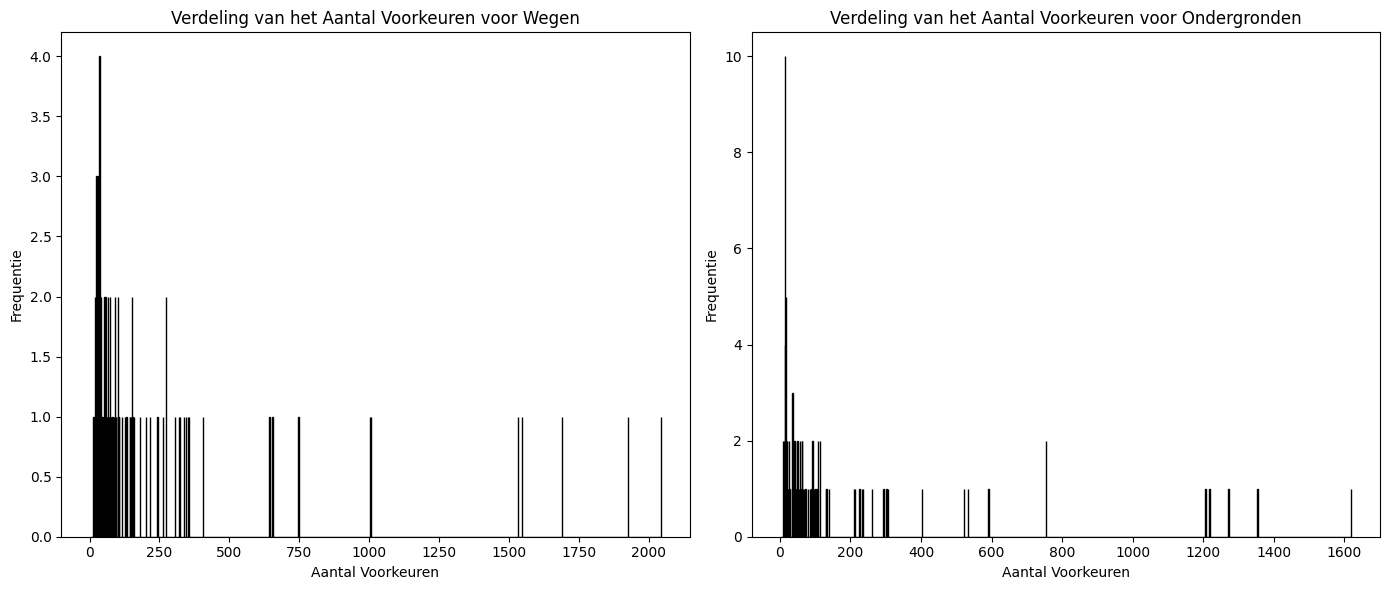

In [1]:
# Now that we've confirmed the necessary data is in the provided JSON file, let's proceed with the analysis.
# First, we need to load the JSON file and analyze the "voorkeur_wegen" (road preferences) and "voorkeur_ondergronden" (surface preferences).

import pandas as pd

# Load the JSON data
file_path = 'demo.json'
data = pd.read_json(file_path, lines=True)

# Extract and prepare data for "voorkeur_wegen" and "voorkeur_ondergronden"
road_prefs = data['highways'].apply(lambda x: sum(x.values()))
surface_prefs = data['surfaces'].apply(lambda x: sum(x.values()))

# Let's plot histograms for both "voorkeur_wegen" and "voorkeur_ondergronden"
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for road preferences
ax[0].hist(road_prefs, bins=range(1, max(road_prefs) + 1), color='skyblue', edgecolor='black')
ax[0].set_title('Verdeling van het Aantal Voorkeuren voor Wegen')
ax[0].set_xlabel('Aantal Voorkeuren')
ax[0].set_ylabel('Frequentie')

# Histogram for surface preferences
ax[1].hist(surface_prefs, bins=range(1, max(surface_prefs) + 1), color='lightgreen', edgecolor='black')
ax[1].set_title('Verdeling van het Aantal Voorkeuren voor Ondergronden')
ax[1].set_xlabel('Aantal Voorkeuren')
ax[1].set_ylabel('Frequentie')

plt.tight_layout()
plt.show()
